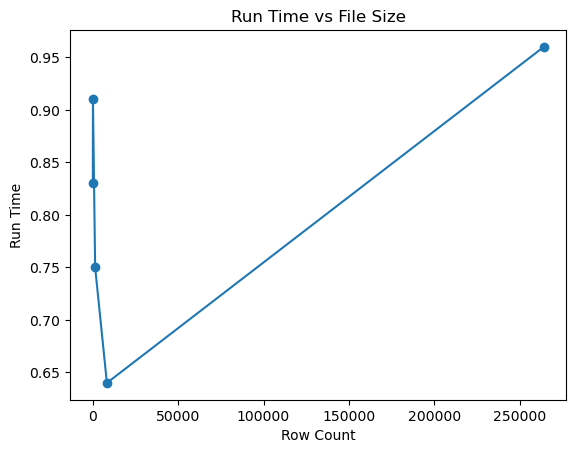

In [11]:
from pyspark.sql import SparkSession
from time import time
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName("SparkSQLApp").getOrCreate()

files = {
    "ta": "gs://dataproc-staging-us-central1-493734936652-dwhhoqnb/ta.csv",
    "tb": "gs://dataproc-staging-us-central1-493734936652-dwhhoqnb/tb.csv",
    "tc": "gs://dataproc-staging-us-central1-493734936652-dwhhoqnb/tc.csv",
    "td": "gs://dataproc-staging-us-central1-493734936652-dwhhoqnb/td.csv",
    "te": "gs://dataproc-staging-us-central1-493734936652-dwhhoqnb/te.csv"
}

run_times = {}
row_counts = {}

for name, path in files.items():    
    start = time()
    
    df = spark.read.csv(path, header=True, inferSchema=True)
    row_counts[name] = df.count()
    end = time()
    run_times[name] = round(end - start, 2)

labels = list(run_times.keys())
sizes = [row_counts[k] for k in labels]
times = [run_times[k] for k in labels]

plt.plot(sizes, times, marker='o')
plt.title("Run Time vs File Size")
plt.xlabel("Row Count")
plt.ylabel("Run Time")
plt.show()
